In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy
import plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode

In [2]:
def findBest(Tmax,G,p,q,a):
    t=0
    bestLength= 1000000000000.0
    bestT = t
    while t >= Tmax:
        b = (q - G * (p**2) - t)/p
        if p>0:
            x =np.linspace(0, p, num=50)
        elif p < 0:
            x =np.linspace(p, 0, num=50)
        lot = np.sqrt(1+(2*G*x + ((q-G*(p**2)-t)/p))**2)
        y= a*(lot) +(1-a)*(lot - t)
        length = scipy.integrate.trapezoid(y,x)
        if length < bestLength:
            #ploting(Tmax,p,q,bestT,G) #comparing possible lines
            bestLength = length
            bestT = t
        t = t - 0.01 #last 
    #ploting(Tmax,p,q,bestT,G)
    #print("length: " + str(bestLength) +" t= " + str(bestT))
    return(bestLength,bestT)

In [3]:
def plotArray(Tmax,G,p,q,a):
    findArray = findBest(Tmax,G,p,q,a)
    t= findArray[1]
    x1=np.linspace(0,p)
    b=(q - G*(p**2) -t)/p
    y1=G * x1**2 + b*x1 + t
    trace2 =go.Scatter(x=x1,y=y1,mode='lines', name= str(findArray[0]))
    return trace2

In [4]:
def mainroot(a,b,c,d):
    Tmax = -1 * np.sqrt((b-d)**2 +(a-c)**2)
    return Tmax

In [5]:
def newPQ(a,b,c,d,p,q):
    m=(d-b)/(c-a)
    x1=((p/m)+q+(m*a)-b)/(m +(1/m))
    y1= m*(x1-a)+b
    newQ= - np.sqrt((b-y1)**2 +(a-x1)**2)
    newP= np.sqrt((p-x1)**2 +(q-y1)**2)
    if p < x1:
        newP=-newP
    print(p,q,newP,newQ)
    return (newP, newQ)

In [6]:
def plotNewpq (p,q,a,b,c,d,G,al,Tmax):
    pqArray= newPQ(a,b,c,d,p,q)
    Array =plotArray(Tmax,G,pqArray[0],pqArray[1],al)
    return Array

In [7]:
def ploting(Tmax, Array):
    y= np.linspace(Tmax,0)
    x=0*y
    trace = go.Scatter(x=x,y=y, mode='lines', name= "main root")
    Array.append(trace)
    iplot(Array)

In [16]:
def findOgT(p,q,a,b,c,d,G,al):
    pqArray = newPQ(a,b,c,d,p,q)
    Tmax = mainroot(a,b,c,d)
    findArray= findBest(Tmax,G,p,q,a)
    t= findArray[1]
    m= (d-b)/(c-a)
    qa= m**2 +1
    qb= 2*m*b - (2*(m**2)*a)
    qc= ((a**2)* (m**2))-(2*m*a*b) +(m*b)-(t**2)
    x1= (-qb + np.sqrt(qb**2 -(4*qa*qc)))/(2*qa)
    if (x1 <a and x1 <c) or (x1>a and x1>c):
        x1= (-qb - np.sqrt(qb**2 -(4*qa*qc)))/(2*qa)
    y1 = m*(x1-a)+b
    return(x1,y1,findArray[0])

1 -4 -4.242640687119285 -4.242640687119285
7 -2 1.4142135623730951 -7.0710678118654755


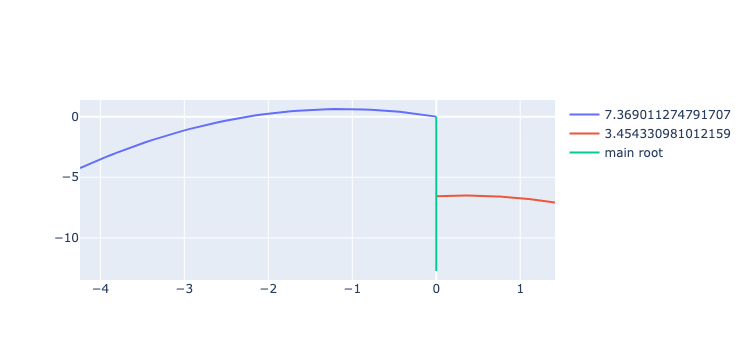

7 -2 1.4142135623730951 -7.0710678118654755
t:  3.158312395177701 -0.1583123951777008


In [15]:
Array=[]
#enter main root cordinates (a,b) and (c,d)
a=1
b=2
c=10
d=-7
Tmax= mainroot(a,b,c,d) #a,b,c,d
#enter G and alpha
G=-.5
al=.8
#enter p,qs
Array.append(plotNewpq(1,-4,a,b,c,d,G,al,Tmax))
Array.append(plotNewpq(7,-2,a,b,c,d,G,al,Tmax))
ploting(Tmax,Array)
findOgT(7,-2,a,b,c,d,G,al)